In [25]:
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (20, 6)
import pandas as pd
from scipy import stats
import numpy as np


fname = 'aviv1.xlsx'


data = pd.read_excel(fname, sheetname=0, header=0, skiprows=None,
                         skip_footer=0, index_col=None, names=['time', 'power'], parse_cols=None, parse_dates=False,
                         date_parser=None, thousands=None, convert_float=True,
                         true_values=None, false_values=None, engine=None, squeeze=False)

### Printing the data

In [26]:
data.head(10)

,time,power
0,18:56:59,0.00275
1,18:57:01,0.00276
2,18:57:02,0.00274
3,18:57:03,0.00275
4,18:57:04,0.00275
5,18:57:05,0.00276
6,18:57:06,0.00276
7,18:57:07,0.00276
8,18:57:08,0.00276
9,18:57:09,0.00276


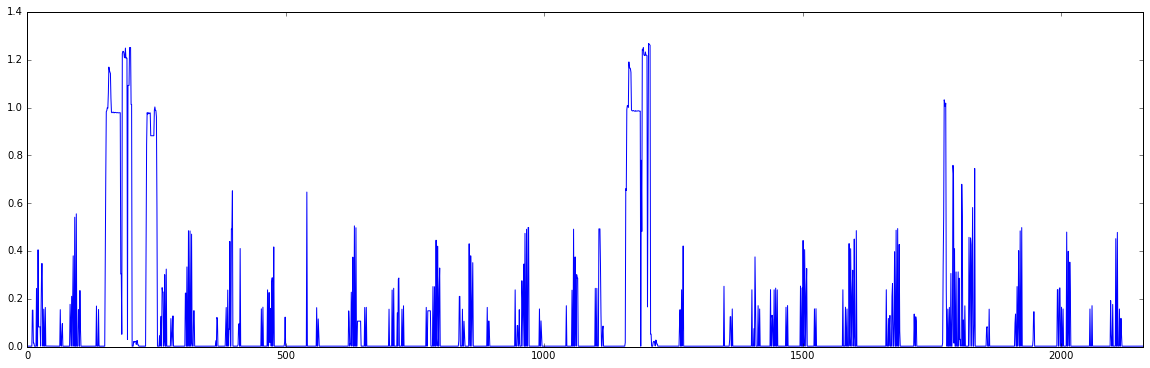

In [27]:
data['power'].plot()

In [44]:
def find_coffe_starts(data):

    ind = []
    for i, row in data.iterrows():
        if row['power'] > .8:
            ind.append(i)

    blocks = []
    for i, val in enumerate(ind):
        if i > 0:
            diff = ind[i] - ind [i-1]
            if diff > 5:
                blocks.append(val)
        else:
            blocks.append(val)        
    print '\n',blocks

    blocks_final = []
    for val in blocks:
        if data.iloc[val : val+20]['power'].mean() > .6:
            blocks_final.append(val)
    print '\nthe final indexes:', blocks_final
    print '\nthe total number of coffe cups:', len(blocks_final)

    return blocks_final

### print index, where coffe begins & total cups #:

In [46]:
ind = find_coffe_starts(data)


[153, 231, 1160, 1774]

the final indexes: [153, 231, 1160]

the total number of coffe cups: 3
